# Bike Sharing Assignment

## Step 1: Reading and Understanding the Data

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Data
bike_data = pd.read_csv("day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [7]:
# Check missing values in data 
print(bike_data.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Data cleaning is not requied as no data is missing.

### Drop data which will not contribute in analysis
    1. instant - it is a index column
    2. dteday - As we have yr, mnth, weekday which are similar to this
    3. casual &
    4. registered - 'cnt' is target variable and is sum of casual and registered which makes them useless

In [8]:
bike_data.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

### Following are the categorical variables, so replacing with meaningful values
    1. season
    2. weekday
    3. weathersit
    4. mnth

In [9]:
bike_data['season'].replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
bike_data['weekday'].replace({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}, inplace=True)
bike_data['weathersit'].replace({1:"Clear", 2:"Mist Cloudy", 3:"Light Rain ", 4:'Heavy Rain'}, inplace=True)

bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Saturday,0,Mist Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Sunday,0,Mist Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 68.6+ KB


### Visualizing continuous variables using pair plot


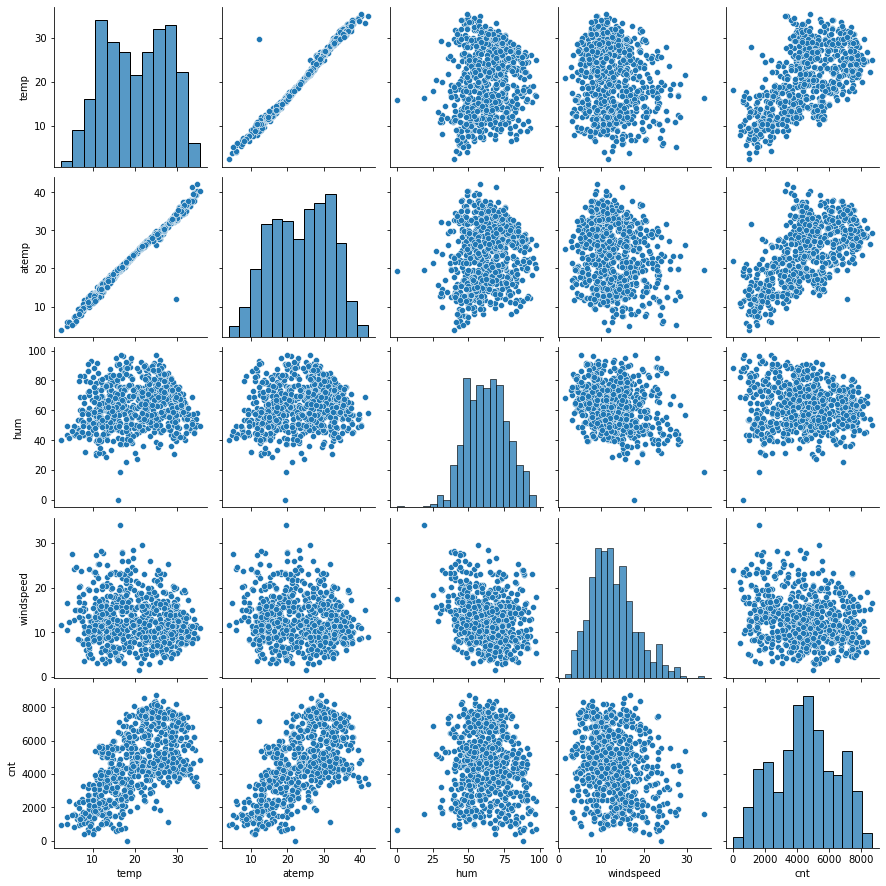

In [11]:
num_var_list = ['temp','atemp','hum','windspeed',"cnt"]
sns.pairplot(bike_data, vars=num_var_list)
plt.show()

## Observation : temp, atemp, hum, windspeed are making linear relationship.

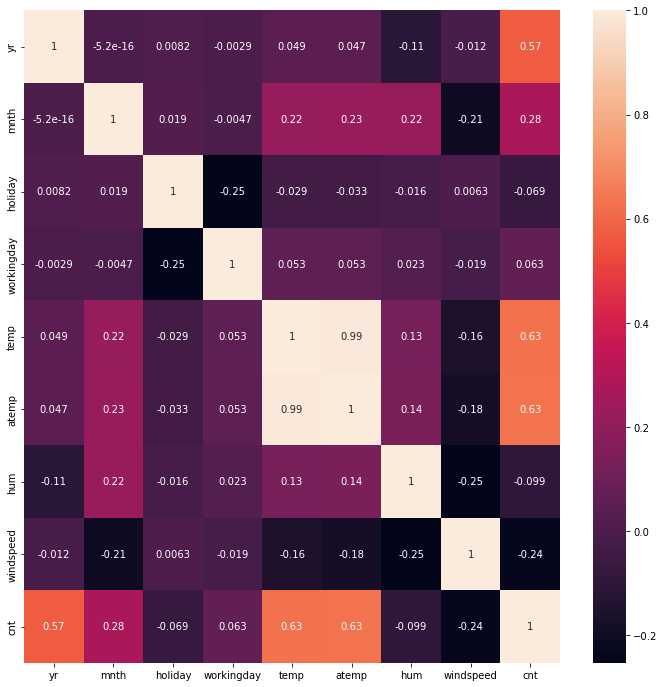

In [12]:
#Generate Heatmap for correlation
plt.figure(figsize = (12, 12))
sns.heatmap(bike_data.corr(), annot = True)
plt.show()

## Observation : temp and atemp are highly correlated, Need to check for multi-colinearity later using VIF

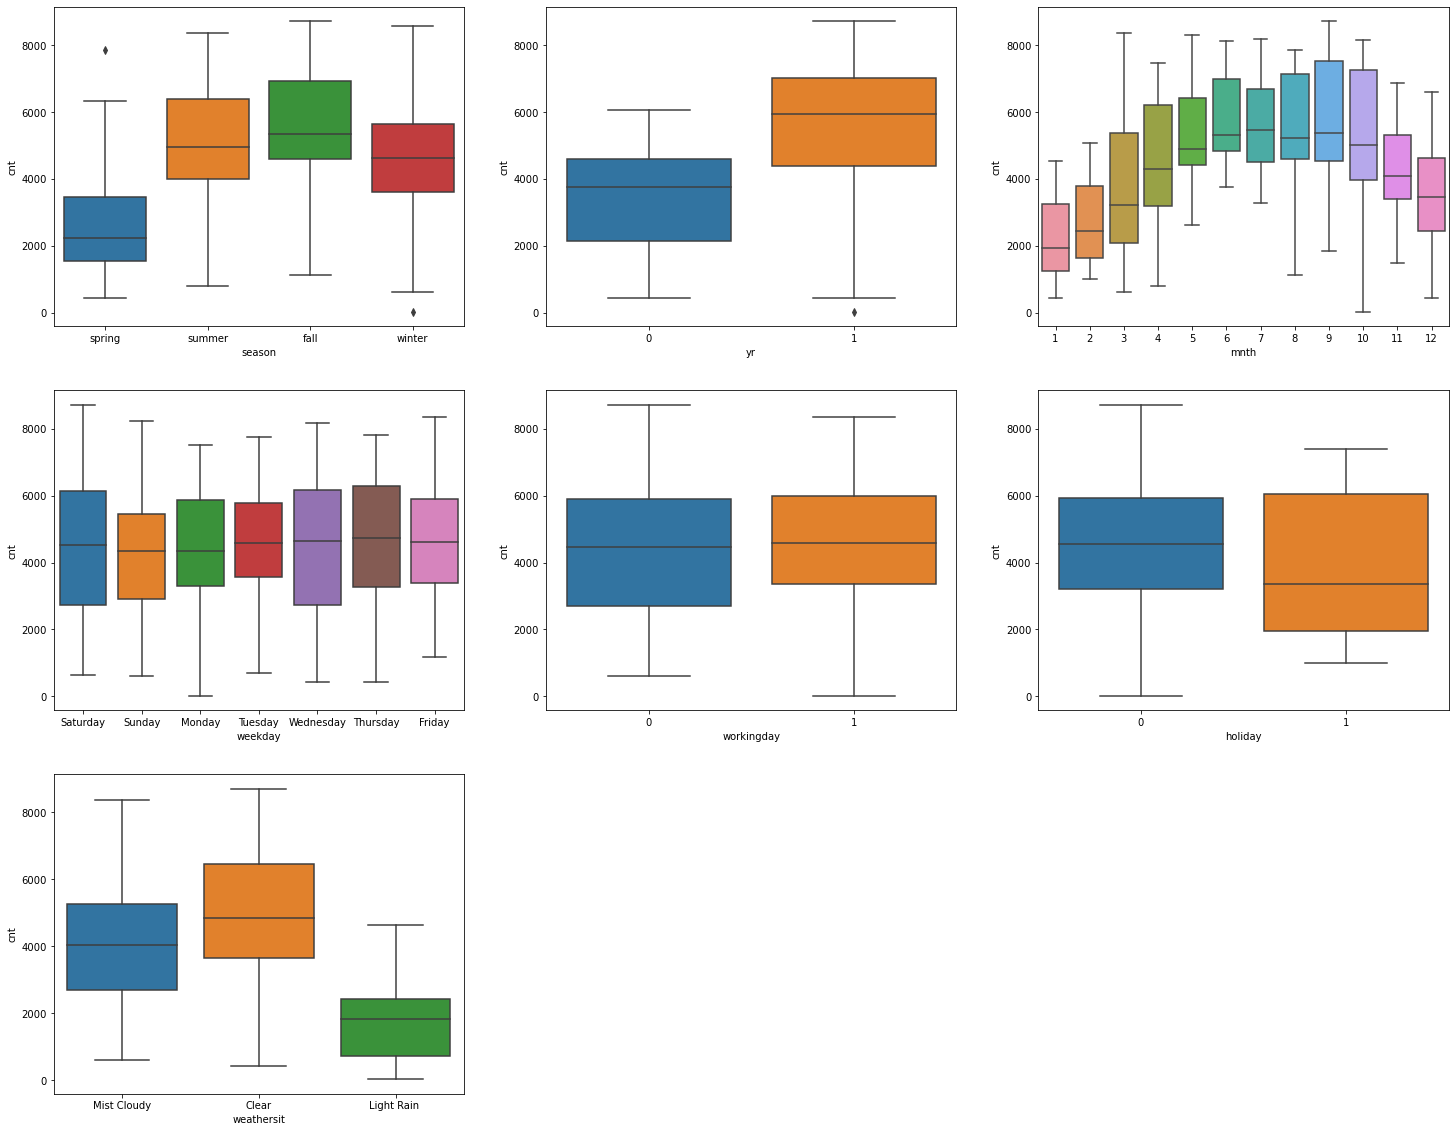

In [13]:
#Visualising categorical Variables
plt.figure(figsize=(25, 20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data) 
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

In [14]:
def plot_category(column):
    plt.figure(figsize = (8,6))
    sns.barplot(column,'cnt', hue='yr', data=bike_data)
    plt.show()

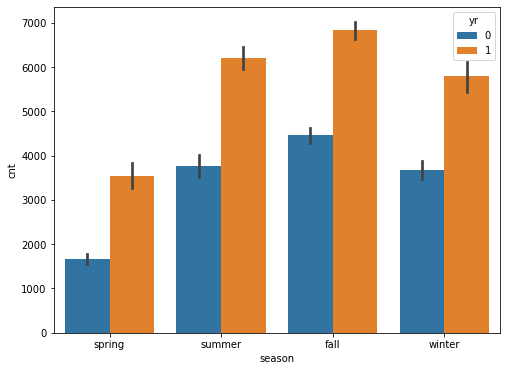

In [15]:
    # plot for season feature
    plot_category('season')

#### Observation : 
####  1. Season Fall is having highest booking in both years
####  2. Year 2019 have more booking compare to year 2018 in all seasons

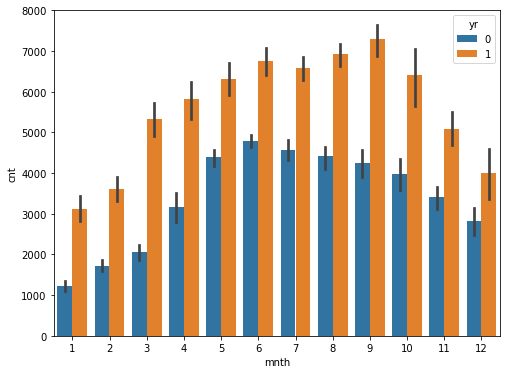

In [16]:
    # plot for mnth feature
    plot_category('mnth')

#### Observation : 
####  1. Bookings are increasing in from month Mar to Sep, Decresing from Oct onwards.
####  2. Year 2019 have more booking compare to year 2018 in all months.

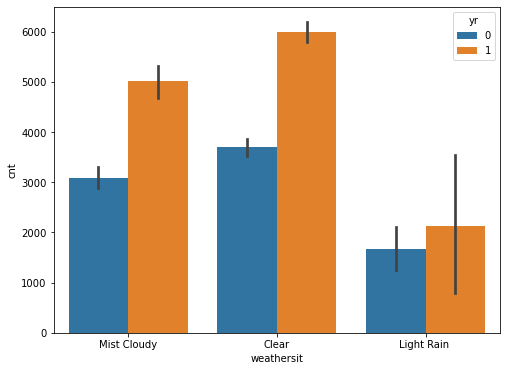

In [17]:
    # plot for weathersit feature
    plot_category('weathersit')

#### Observation : 
####  1. Bookings are more in Clear weather compare to others
####  2. Year 2019 have more booking compare to year 2018.

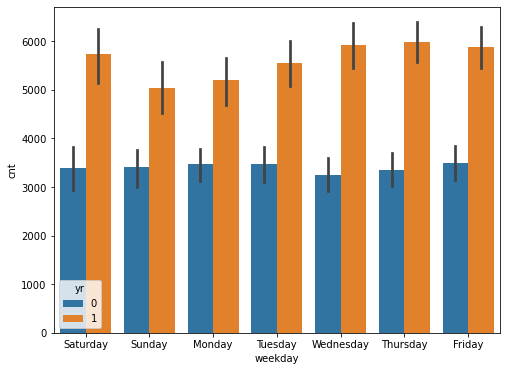

In [18]:
 # plot for weekday feature
plot_category('weekday')

#### Observation : 
####  1. No significance impact of weekdays in bookings
####  2. Year 2019 have more booking compare to year 2018.

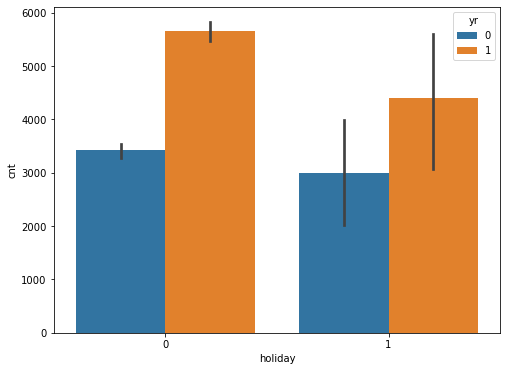

In [19]:
 # plot for holiday feature
plot_category('holiday')

#### Observation : 
####  1. There is a significance impact of Holidays in bookings
####  2. Year 2019 have more booking compare to year 2018.

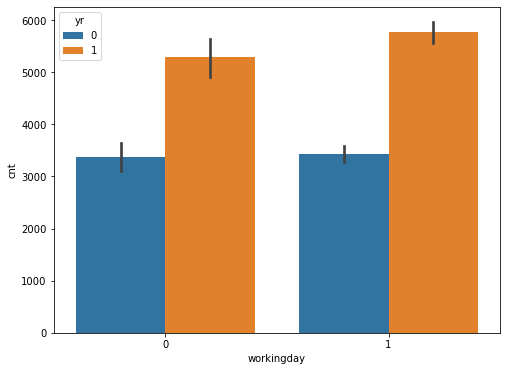

In [20]:
 # plot for workingday feature
plot_category('workingday')

#### Observation : 
####  1. No significance impact of workingday in bookings
####  2. Year 2019 have more booking compare to year 2018.

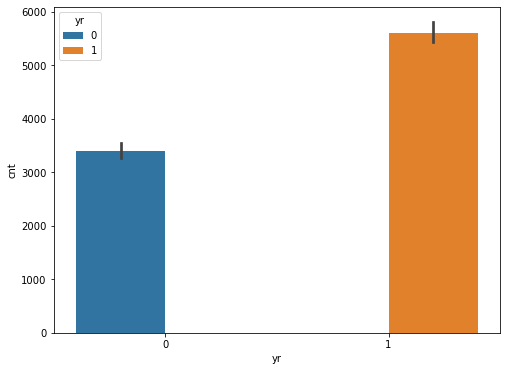

In [21]:
# plot for yr feature
plot_category('yr')

#### Observation : 
####  2. Year 2019 have more booking compare to year 2018.

## Step 3: Data Preparation

In [22]:
# Dummy variable creation for mnth, weekday, weathersit and season variables.
months_value=pd.get_dummies(bike_data['mnth'],drop_first=True)
weekdays_value=pd.get_dummies(bike_data['weekday'],drop_first=True)
weathersit_value=pd.get_dummies(bike_data['weathersit'],drop_first=True)
seasons_value=pd.get_dummies(bike_data['season'],drop_first=True)

In [23]:
bike_data =pd.concat([bike_data, months_value, weekdays_value, weathersit_value, seasons_value],axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
0,spring,0,1,0,Saturday,0,Mist Cloudy,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,1,0,Sunday,0,Mist Cloudy,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,1,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,1,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,1,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [24]:
#Deleting the season ,weathersit, weekday and mnth columns
bike_data.drop(['season', 'weathersit', 'weekday','mnth'], axis=1, inplace=True)
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [25]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yr           730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   temp         730 non-null    float64
 4   atemp        730 non-null    float64
 5   hum          730 non-null    float64
 6   windspeed    730 non-null    float64
 7   cnt          730 non-null    int64  
 8   2            730 non-null    uint8  
 9   3            730 non-null    uint8  
 10  4            730 non-null    uint8  
 11  5            730 non-null    uint8  
 12  6            730 non-null    uint8  
 13  7            730 non-null    uint8  
 14  8            730 non-null    uint8  
 15  9            730 non-null    uint8  
 16  10           730 non-null    uint8  
 17  11           730 non-null    uint8  
 18  12           730 non-null    uint8  
 19  Monday  

## Step 4. Split into training and test data

In [26]:
# Import sklearn for data split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bike_data, train_size = 0.7, test_size = 0.3, random_state = 100)


In [27]:
train_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,1,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,0,...,1,0,0,0,0,0,1,0,1,0


In [28]:
train_data.columns

Index([         'yr',     'holiday',  'workingday',        'temp',
             'atemp',         'hum',   'windspeed',         'cnt',
                   2,             3,             4,             5,
                   6,             7,             8,             9,
                  10,            11,            12,      'Monday',
          'Saturday',      'Sunday',    'Thursday',     'Tuesday',
         'Wednesday', 'Light Rain ', 'Mist Cloudy',      'spring',
            'summer',      'winter'],
      dtype='object')

In [29]:
# Import Numberical vars scalling function
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [30]:
NumVar=['temp', 'atemp','hum','windspeed','cnt']
train_data[NumVar] = scaler.fit_transform(train_data[NumVar])

In [31]:
train_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0


In [32]:
train_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.066667,0.098039,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137,0.243137,0.245098,0.24902
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.249689,0.297660,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223,0.429398,0.430568,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [33]:
# X and Y 
y_train = train_data.pop('cnt')
X_train = train_data

In [34]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,2,3,4,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,1,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,1,...,1,0,0,0,0,0,1,0,1,0


In [35]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [36]:
# Importing RFE library
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# RFE method for feature selection
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)            
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 (2, False, 8),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 9),
 (8, False, 2),
 (9, True, 1),
 (10, False, 3),
 (11, False, 10),
 (12, False, 11),
 ('Monday', False, 13),
 ('Saturday', False, 4),
 ('Sunday', False, 12),
 ('Thursday', False, 15),
 ('Tuesday', False, 14),
 ('Wednesday', False, 16),
 ('Light Rain ', True, 1),
 ('Mist Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1)]

In [39]:
column = X_train.columns[rfe.support_]
column

Index([         'yr',     'holiday',        'temp',         'hum',
         'windspeed',             3,             4,             5,
                   6,             9, 'Light Rain ', 'Mist Cloudy',
            'spring',      'winter'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday',      'atemp',            2,            7,            8,
                 10,           11,           12,     'Monday',   'Saturday',
           'Sunday',   'Thursday',    'Tuesday',  'Wednesday',     'summer'],
      dtype='object')

In [41]:
X_train_rfe = X_train[column]

In [42]:
# import Statsmodellibrary
import statsmodels.api as sm  

In [43]:
# Add constant
X_train_rfe1 = sm.add_constant(X_train_rfe)
#OLS best fit
lm = sm.OLS(y_train,X_train_rfe1).fit()
lm.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     186.8
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          3.52e-187
Time:                        19:11:48   Log-Likelihood:                 507.16
No. Observations:                 510   AIC:                            -984.3
Df Residuals:                     495   BIC:                            -920.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2977      0.034      8.863      0.000       0.232       0.364
yr              0.2312      0.008     28.192      0.000       0.215       0.247
holiday        -0.0904      0.026     -3.503      0.001      -0.141      -0.040
temp            0.4752      0.032     14.786      0.000       0.412       0.538
hum            -0.1566      0.038     -4.085      0.000      -0.232      -0.081
windspeed      -0.1805      0.026     -6.920      0.000      -0.232      -0.129
3               0.0530      0.015      3.581      0.000       0.024       0.082
4               0.0530      0.019      2.786      0.006       0.016       0.090
5               0.0745      0.017      4.386      0.000       0.041       0.108
6               0.0314      0.017      1.813      0.070      -0.003       0.065
9               0.0963      0.016      5.990      0.000       0.065       0.128
Light Rain     -0.2443      0.027     -9.189      0.000      -0.297      -0.192
Mist Cloudy    -0.0546      0.011     -5.162      0.000      -0.075      -0.034
spring         -0.0773      0.018     -4.215      0.000      -0.113      -0.041
winter          0.0977      0.015      6.361      0.000       0.067       0.128
==============================================================================
Omnibus:                       67.312   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.412
Skew:                          -0.699   Prob(JB):                     6.58e-35
Kurtosis:                       5.335   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Identify VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.47
2,temp,14.88
4,windspeed,4.68
12,spring,3.40
13,winter,2.84
11,Mist Cloudy,2.26
0,yr,2.09
6,4,1.51
7,5,1.46
8,6,1.35


### Observarion : Column 6 have high p-value, Need to drop this variable

In [45]:
# dropping variable "6" due to high p-value and re-process the model
X_train_rfe=X_train_rfe.drop([6], axis=1)

In [46]:
X_train_rfe2 = sm.add_constant(X_train_rfe)
lm2 = sm.OLS(y_train,X_train_rfe2).fit()
lm2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     200.0
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.25e-187
Time:                        19:11:48   Log-Likelihood:                 505.47
No. Observations:                 510   AIC:                            -982.9
Df Residuals:                     496   BIC:                            -923.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3065      0.033      9.203      0.000       0.241       0.372
yr              0.2308      0.008     28.094      0.000       0.215       0.247
holiday        -0.0914      0.026     -3.536      0.000      -0.142      -0.041
temp            0.4785      0.032     14.879      0.000       0.415       0.542
hum            -0.1613      0.038     -4.208      0.000      -0.237      -0.086
windspeed      -0.1796      0.026     -6.870      0.000      -0.231      -0.128
3               0.0494      0.015      3.363      0.001       0.021       0.078
4               0.0451      0.019      2.432      0.015       0.009       0.082
5               0.0668      0.016      4.053      0.000       0.034       0.099
9               0.0901      0.016      5.722      0.000       0.059       0.121
Light Rain     -0.2448      0.027     -9.189      0.000      -0.297      -0.192
Mist Cloudy    -0.0548      0.011     -5.167      0.000      -0.076      -0.034
spring         -0.0835      0.018     -4.621      0.000      -0.119      -0.048
winter          0.0911      0.015      6.091      0.000       0.062       0.120
==============================================================================
Omnibus:                       68.151   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.682
Skew:                          -0.702   Prob(JB):                     7.78e-36
Kurtosis:                       5.374   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,25.45
2,temp,14.46
4,windspeed,4.65
11,spring,3.35
12,winter,2.74
10,Mist Cloudy,2.26
0,yr,2.09
6,4,1.46
7,5,1.39
5,3,1.28


### Observarion : All p-values are in range (<0.05) but VIF for "hum" is very high. Need to remove this variable.

In [48]:
# dropping variable "hum" due to very high vif and re-process the model
X_train_rfe=X_train_rfe.drop(['hum'],axis=1)

In [49]:
X_train_rfe3 = sm.add_constant(X_train_rfe)
lm3 = sm.OLS(y_train,X_train_rfe3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.89e-185
Time:                        19:11:48   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2218      0.027      8.224      0.000       0.169       0.275
yr              0.2343      0.008     28.195      0.000       0.218       0.251
holiday        -0.0922      0.026     -3.508      0.000      -0.144      -0.041
temp            0.4502      0.032     14.081      0.000       0.387       0.513
windspeed      -0.1496      0.026     -5.851      0.000      -0.200      -0.099
3               0.0501      0.015      3.352      0.001       0.021       0.079
4               0.0443      0.019      2.349      0.019       0.007       0.081
5               0.0551      0.017      3.334      0.001       0.023       0.088
9               0.0837      0.016      5.254      0.000       0.052       0.115
Light Rain     -0.2891      0.025    -11.618      0.000      -0.338      -0.240
Mist Cloudy    -0.0804      0.009     -9.101      0.000      -0.098      -0.063
spring         -0.0901      0.018     -4.927      0.000      -0.126      -0.054
winter          0.0785      0.015      5.273      0.000       0.049       0.108
==============================================================================
Omnibus:                       65.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.586
Skew:                          -0.691   Prob(JB):                     5.43e-33
Kurtosis:                       5.255   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.64
2,temp,3.93
0,yr,2.08
10,spring,1.95
11,winter,1.55
9,Mist Cloudy,1.53
5,4,1.33
4,3,1.28
6,5,1.25
7,9,1.20


### Observarion : Now all variables VIF are in range (<5). This look like a good model.


## Step 5: Residual Analysis of the train data


In [51]:
y_train_pred = lm3.predict(X_train_rfe3)

Text(0.5, 0, 'Errors')

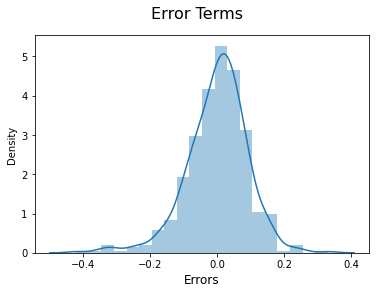

In [52]:
error = y_train - y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot(error, bins = 20)
fig.suptitle('Error Terms', fontsize = 16)                  
plt.xlabel('Errors', fontsize = 12)     

Text(0.5, 1.0, 'Q-Q Plot')

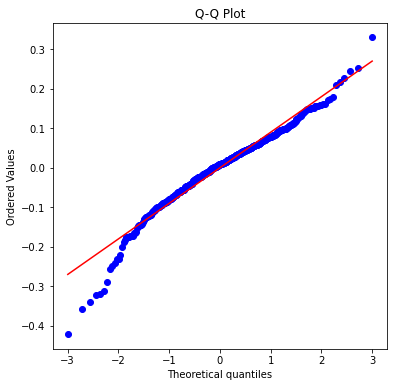

In [53]:
import scipy.stats as stats
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(6,6))
stats.probplot(error, dist="norm", plot=plt)
plt.title("Q-Q Plot")

Text(0.5, 1.0, 'Residual plot')

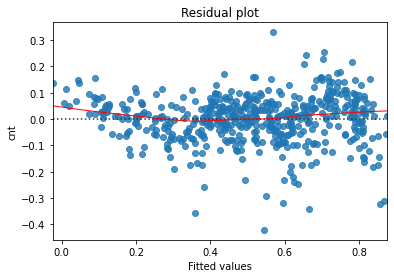

In [54]:
# Residual plot 
fig = plt.figure()
sns.residplot(y_train_pred,y_train, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')  

### Observation : Error term is normal distributed.

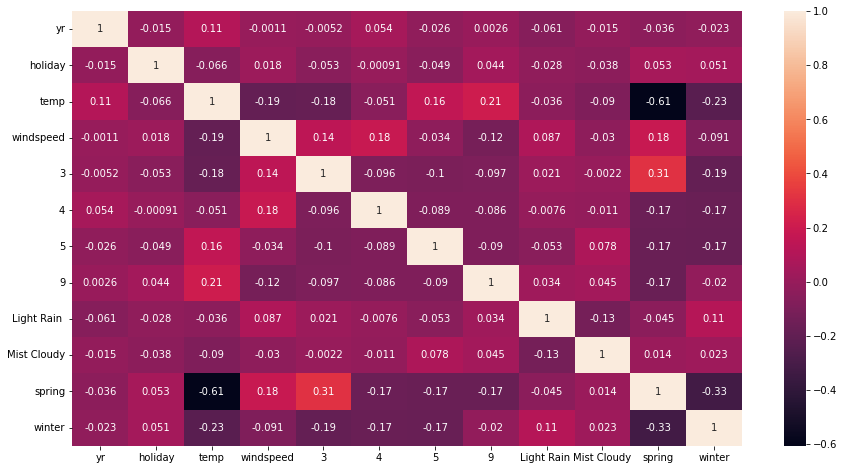

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True)
plt.show()

### Inferences
### The errors are normally distributed.
### The mean of residuals is zero.
### Residuals are homoscedastic.
### The residual plot doesn't indicate any covariance trend in the error.

## Model is looking good for Prediction

   ## Step 7 : Making Predictions on final model

In [56]:
# Applying scaling on the test dataset

num_var_list = ['temp','atemp','hum','windspeed',"cnt"]
test_data[num_var_list] = scaler.transform(test_data[num_var_list])
test_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [57]:
test_data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,2,3,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light Rain,Mist Cloudy,spring,summer,winter
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.100457,0.054795,...,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635,0.255708,0.264840,0.232877
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.301297,0.228100,...,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403,0.437258,0.442259,0.423633
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
y_test = test_data.pop('cnt')


In [59]:
X_test = test_data

In [60]:
columns1 = X_train_rfe.columns

X_test = X_test[columns1]

# Adding constant variable to test dataframe
X_test_lr3 = sm.add_constant(X_test)

In [61]:
# Making predictions
y_pred = lm3.predict(X_test_lr3)

In [62]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
round(r2,4)

0.8073

In [63]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7961


## Observation : R square of our model is 80.73



 ## Step 8 :  Model Evaluation

Text(0, 0.5, 'y_pred')

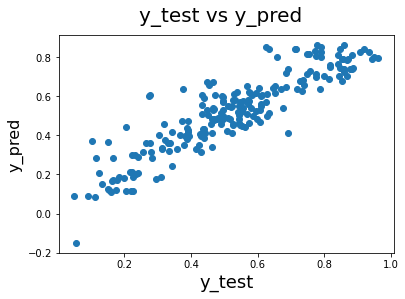

In [64]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [65]:
round(lm3.params ,4)

const          0.2218
yr             0.2343
holiday       -0.0922
temp           0.4502
windspeed     -0.1496
3              0.0501
4              0.0443
5              0.0551
9              0.0837
Light Rain    -0.2891
Mist Cloudy   -0.0804
spring        -0.0901
winter         0.0785
dtype: float64

### Equation for best fitted line can be drawn as below
### cnt = 0.2218 + 0.2343 x yr - 0.0922 x holiday + 0.4502 x temp - 0.1496 x windspeed + 0.0501 x 3 + 0.0443 x 4 + 0.0551 X 5 + 0.0837 X 9 - 0.2891 x Light Rain - 0.0804 x Misty Cloudy -0.0901 x spring + 0.0785 x winter

In [66]:
X_train_rfe3.columns


Index([      'const',          'yr',     'holiday',        'temp',
         'windspeed',             3,             4,             5,
                   9, 'Light Rain ', 'Mist Cloudy',      'spring',
            'winter'],
      dtype='object')

In [67]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.2
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          4.89e-185
Time:                        19:11:49   Log-Likelihood:                 496.52
No. Observations:                 510   AIC:                            -967.0
Df Residuals:                     497   BIC:                            -912.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2218      0.027      8.224      0.000       0.169       0.275
yr              0.2343      0.008     28.195      0.000       0.218       0.251
holiday        -0.0922      0.026     -3.508      0.000      -0.144      -0.041
temp            0.4502      0.032     14.081      0.000       0.387       0.513
windspeed      -0.1496      0.026     -5.851      0.000      -0.200      -0.099
3               0.0501      0.015      3.352      0.001       0.021       0.079
4               0.0443      0.019      2.349      0.019       0.007       0.081
5               0.0551      0.017      3.334      0.001       0.023       0.088
9               0.0837      0.016      5.254      0.000       0.052       0.115
Light Rain     -0.2891      0.025    -11.618      0.000      -0.338      -0.240
Mist Cloudy    -0.0804      0.009     -9.101      0.000      -0.098      -0.063
spring         -0.0901      0.018     -4.927      0.000      -0.126      -0.054
winter          0.0785      0.015      5.273      0.000       0.049       0.108
==============================================================================
Omnibus:                       65.449   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.586
Skew:                          -0.691   Prob(JB):                     5.43e-33
Kurtosis:                       5.255   Cond. No.                         15.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Comparision between Training and Testing dataset:
### - Train dataset R^2          : 0.834
### - Test dataset R^2           : 0.8073
### - Train dataset Adjusted R^2 : 0.830    
### - Test dataset Adjusted R^2  : 0.7961
    
# Demand of bikes depend on year, holiday, temp, windspeed, mar, apr, may, sep, Light rain, Misty, spring and winter.